Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
da=pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')
da=da.set_index('Month')
da

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [10]:
da.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [11]:
da.shape

(96, 1)

In [12]:
da.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


<Axes: xlabel='Month'>

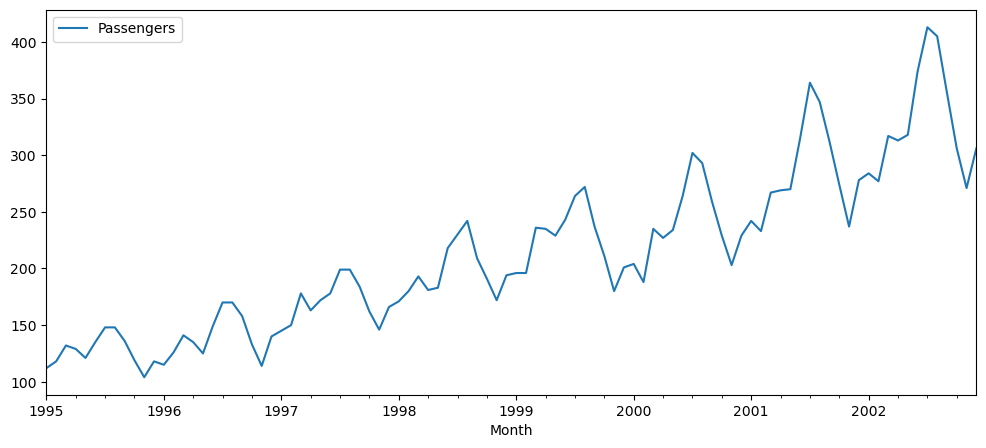

In [13]:
# TIME SERIES ANALYSIS
#LINE PLOTING
da.plot(figsize=(12,5))

<Axes: >

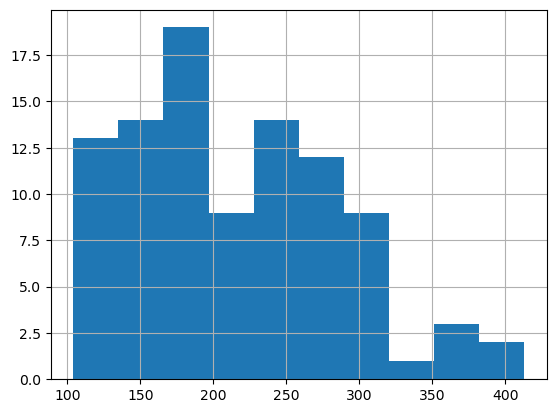

In [14]:
#ploting Histogram
da['Passengers'].hist()

<Axes: ylabel='Density'>

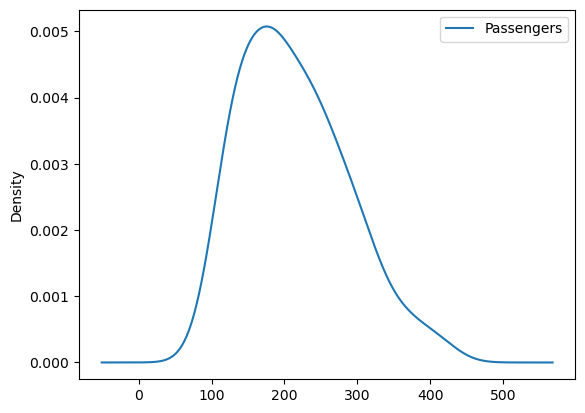

In [15]:
#Density ploting
da.plot(kind='kde')

In [16]:
da.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# TIME SERIES DECOMPOSITION

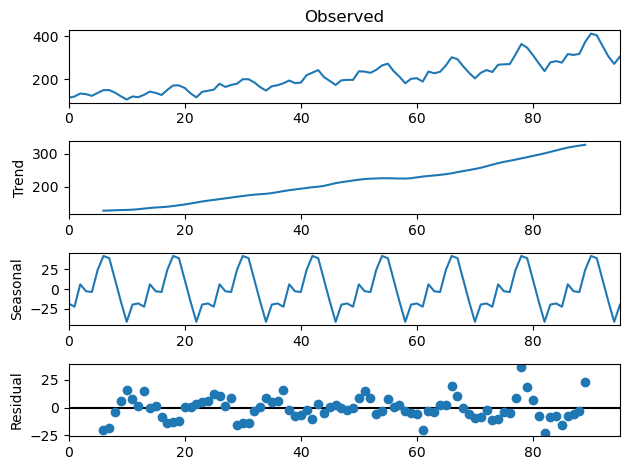

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_de=seasonal_decompose((da.values),period=12,model='additive')
ts_plot = ts_de.plot()

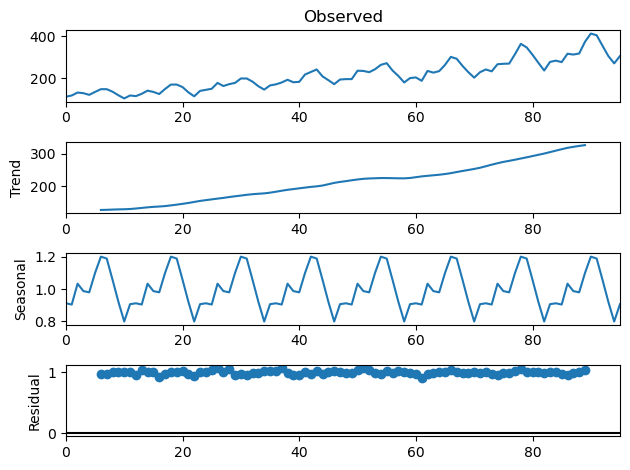

In [18]:

ts_decomp_mul= seasonal_decompose((da.values),model='multiplicative',period = 12)

ts_plot_mul = ts_decomp_mul.plot()

In [19]:
# FORECASTING MODELS BUILDING
da_train=da[0:70]
da_test=da[70:]

In [20]:
print("length of the train data:",len(da_train))
print("length of the test data:",len(da_test))

length of the train data: 70
length of the test data: 26


In [21]:
da_train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [22]:
da_test.head()

,Passengers
Month,
2000-11-01,203
2000-12-01,229
2001-01-01,242
2001-02-01,233
2001-03-01,267


In [23]:
# METHODS FOR FORECASTING
# 1.SIMPLE MOVING AVERAGE
dt_ma=da.copy()

In [24]:
train_len=70

In [25]:
dt_ma['ma_forecast']=dt_ma['Passengers'].rolling(12).mean()

In [26]:
dt_ma['ma_forecast'][train_len:] = dt_ma['ma_forecast'][train_len-1]

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
#RMSE AND MAPE
rmse_ma = mean_squared_error(da_test['Passengers'],dt_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

83.22

In [29]:
# 2:-SIMPLE EXPONENTIAL SMOOTHING
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(da_train['Passengers']).fit(smoothing_level=0.13)
pre_model=model.predict(start= da_test.index[0],end = da_test.index[-1])

/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
rmse_ses = mean_squared_error(da_test['Passengers'],pre_model,squared=False).round(2)
rmse_ses

77.47

In [31]:
# 3.HOLT'S METHOD
from statsmodels.tsa.holtwinters import Holt


In [32]:
model2 = Holt(da_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.23)
pred_holt = model2.predict(start = da_test.index[0],end = da_test.index[-1])

/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
rmse_holt = mean_squared_error(da_test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

151.38

In [34]:
# 4. Holt's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [35]:
hes_add = ExponentialSmoothing(da_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_add = hes_add.predict(start = da_test.index[0],end = da_test.index[-1])

/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
rmse_hes = mean_squared_error(da_test['Passengers'],pred_add,squared=False).round(2)
rmse_hes

42.76

In [37]:
hes_mul = ExponentialSmoothing(da_train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_mul= hes_mul.predict(start = da_test.index[0],end = da_test.index[-1])

/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
rmse_mul = mean_squared_error(da_test['Passengers'],pred_mul,squared=False).round(2)
rmse_mul

34.85

In [39]:
# 5. ARIMA model
#autocorrelation upto lags 20
from  statsmodels.graphics.tsaplots import plot_acf


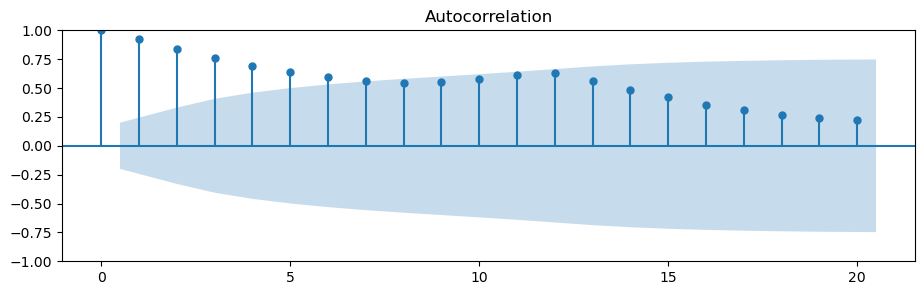

In [40]:
plt.figure(figsize=(11,3))
acf_plot = plot_acf( da['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [41]:
# PCF PLOT
from statsmodels.graphics.tsaplots import plot_pacf

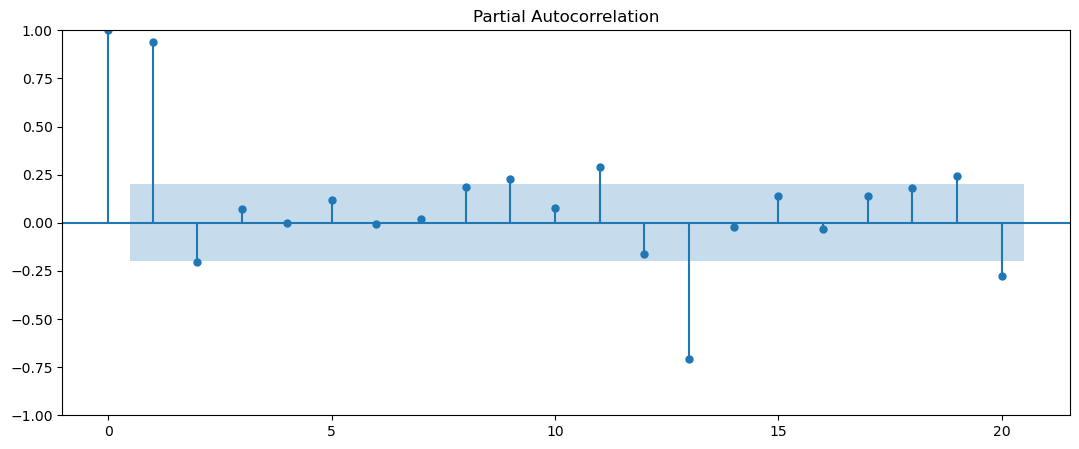

In [42]:
plt.figure(figsize=(13,5))
pacf_plot = plot_pacf( da['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
arima = ARIMA(da_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = da_test.index[0],end = da_test.index[-1])

/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
rmse_arima = mean_squared_error(da_test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

90.22

In [46]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes,rmse_mul,rmse_arima]
d={'Models':models,'Rmse':rmse}
dt_model=pd.DataFrame(d)
dt_model

,Models,Rmse
0,simple_moving_average,83.22
1,simple_expo_smoothing,77.47
2,Holt,151.38
3,Holt_additive,42.76
4,Holt_multiplicative,34.85
5,ARIMA,90.22


In [47]:
dt_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.85
3,Holt_additive,42.76
1,simple_expo_smoothing,77.47
0,simple_moving_average,83.22
5,ARIMA,90.22
2,Holt,151.38
